# Data-analytiikka - Harjoitus 7

Huomaa, että tehtävät tulee palauttaa html-tiedostona, jossa näkyvät sekä koodisolujen sisällöt että tulosteet. Notebookin saat html-tiedostoksi valitsemalla File -> Download as -> HTML. Tehtävien vastaukset voi tehdä yhteen tai useampaan koodisoluun.

**Opiskelijan nimi:** Pyry Anttila

**Opiskelijanumero:** AD0828 

## Kuvaajien muotoilut

Visualisointi on yksi tehokkaimmista keinoista tehdä havaintoja datasta. Kuvaajien ja kaavioiden luettavuuden takia kuvioihin on kuitenkin syytä sisällyttää otsikko (title) ja akseleiden nimet (label). Toisinaan voi olla paikallaan asettaa myös taustaruudukko (grid) ja muuttaa akseleiden merkkien (ticks) välistystä.

Alla on annettu kaavion luontikoodi (käyttäen np-taulukoita). Tee kaaviosta yksityiskohtaisesti alla olevan mallin mukainen. Tutki [matplotlibin speksistä](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html), miten kaavion osia muotoillaan. Akseleiden ja kuvaajan muiden viivojen paksuudet voit jättää oletusasetuksille. Gridissä, suorassa ja käyrissä käytetyt värit ovat 'blue', 'red', 'black' ja 'green'. Jos et erota värejä toisistaan, ei haittaa jos värit menevät "väärinpäin".

![malli2](https://student.labranet.jamk.fi/~ajota/Data-analytics/images/malli_kuvaajien_muotoilut.png)

Pisteytys: 1.5 p

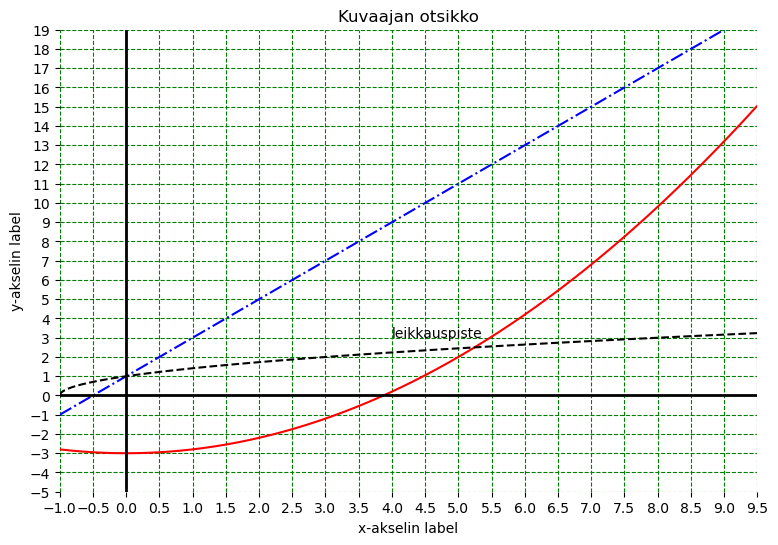

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

x = np.linspace(-1,10,1000)
y1 =  2*x +1
y2 = 0.2*x**2-3
y3 = (x+1)**0.5

# Lähde täyttämään muotoiluja alla olevaan koodiin.
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(x, y1, 'b-.')
ax.plot(x, y2, 'r')
ax.plot(x, y3, 'k--', label='leikkauspiste')


# Y-Akselin rivit
ax.set_ylim(-5, 19)

ymajor_locator = ticker.MultipleLocator(1)
ax.yaxis.set_major_locator(ymajor_locator)

# X-Akselin rivit
ax.set_xlim(-1, 9.5)

xmajor_locator = ticker.MultipleLocator(0.5)
ax.xaxis.set_major_locator(xmajor_locator)

# Gridin muotoilu
ax.grid(color='g', linestyle='--',)

# Otsikot
ax.set_title('Kuvaajan otsikko')
ax.set_ylabel('y-akselin label')
ax.set_xlabel('x-akselin label')

# Reunojen poisto
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Origon marginaali
ax.axhline(color='black', linewidth=2)
ax.axvline(color='black', linewidth=2)

# Leikkauspiste teksti
x_pos = 4
y_pos = 3
ax.text(x_pos, y_pos, 'leikkauspiste', fontsize=10, color='black')

plt.show()

## Lähdemaat vaakapylväskaaviossa

Lue data käyttöön osoitteesta 'https://student.labranet.jamk.fi/~ajota/Datasets/cybersecurity_attacks_2022_2023.csv' ja visualisoi yhteyksien määrä vaakapylväskaavioon lähdemaanosan mukaan ('Source IP Continent'). Samaa voisi tehdä esimerkiksi IP-osoitteiden ja muiden tietojen osalta tietyllä aikavälillä, jolloin dataa visualisoitaessa silmiin voisi pistää jotakin epäilyttävää ja tarkemman syynäyksen aihetta. Keskitytään tässä toistaiseksi harjoittelemaan visualisointia ja katsotaan, mistä yhteydenotot tulevat.

Huom! Yhteyksien lukumäärän tulee vastata alla olevan mallin lukumääriä. Värien tai palkkien järjestysten ei tarvitse olla samat kuin mallissa. Halutessasi voit myös asettaa x-akselille suomenkielisen selitteen ja otsikon kuvaajalle.

![malli](https://student.labranet.jamk.fi/~ajota/Data-analytics/images/malli_vaakapylvaskaavio_sourceIPcontinent.png)

Pisteytys: 0.5 p

In [2]:
import pandas as pd
import seaborn as sns

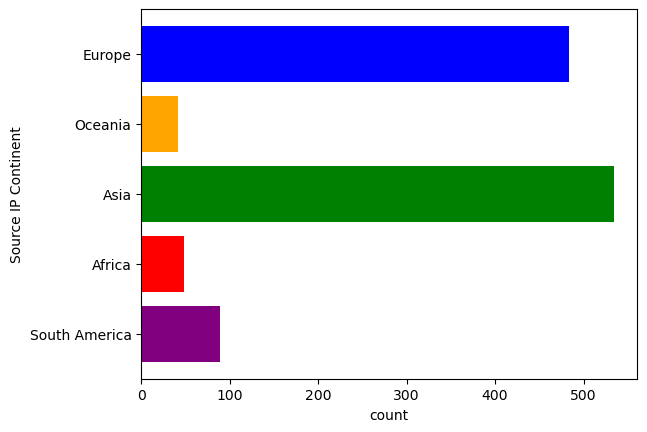

In [3]:
# Käytettävä data:
df = pd.read_csv('https://student.labranet.jamk.fi/~ajota/Datasets/cybersecurity_attacks_2022_2023.csv', index_col=0)

# Koodia tänne:
df2 = df['Source IP Continent'].value_counts(sort=False)

# Värit
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Palkit
plt.barh(df2.index, df2, color=colors)

# Otsikot
plt.xlabel('count')
plt.ylabel('Source IP Continent')

# Muotoilu ja piirtäminen
plt.grid(False)
plt.gca().invert_yaxis()

plt.show()

## Muutoksen visualisointia

Jatketaan edellisen tehtävän datalla. Toisinaan dataa tutkiessa on hyödyllistä tehdä vertailua aikaisempaan ajankohtaan. Tällöin voi saada viitteitä mahdollisista muutoksista tai siitä, mikä on "normaalia". Millainen tilanne on ollut aikaisemmin ja onko tähän hetkeen verrattuna tapahtunut muutoksia? Onko normaalia, että ajankohtana X esiintyy liikennettä tai että liikennettä onkin maasta Y? Myös vertailussa visualisointi on tehokas keino. Vertailua voi kokeilla tilanteen mukaan vuosi-, kuukausi-, päivä- ja tuntitasolla. Jos vertailtavia kohteita on paljon, viivakaavio voi olla havainnolisempi vaihtoehto.

Tee pylväskaavio, jossa on visualisoitu Euroopan ('Source IP Continent') eri maiden liikennemäärät vuositasolla pylväskaavioon alla olevan mallin mukaisesti. Huomaa että osa pylväskaavioon piirtämiseen tarvitsemistasi tiedoista voi puuttua datasta -> muodosta dataframeen uusi tai uusia sarakkeita siten, että saat kaavion tehtyä. Huomioi myös kaavion muotoilut!

![malli2](https://student.labranet.jamk.fi/~ajota/Data-analytics/images/malli_pylvaskaavio_sourceIPcontinentEurope.png)

Pisteytys: 1 p

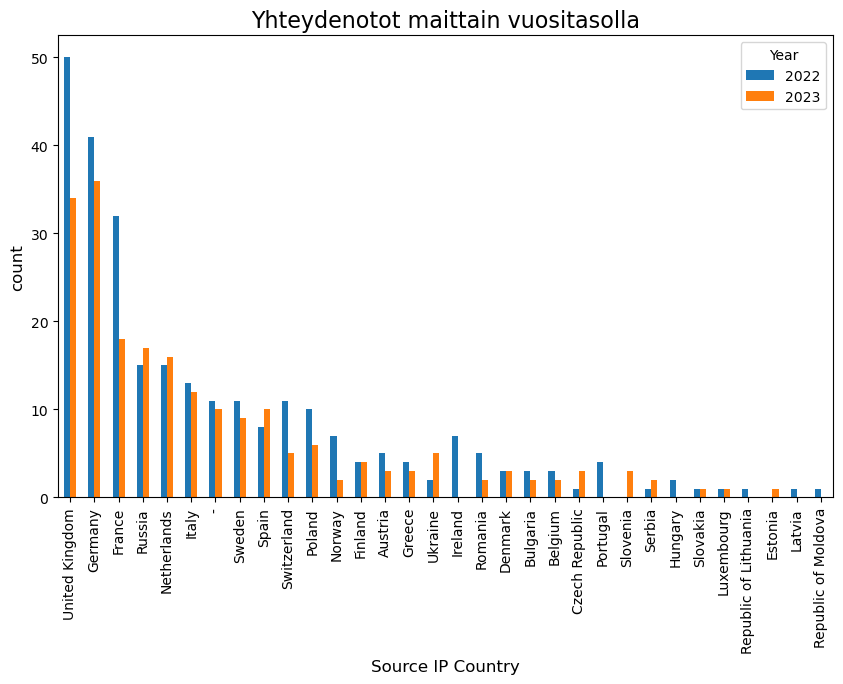

In [4]:
# Käytettävä data:
df3 = pd.read_csv('https://student.labranet.jamk.fi/~ajota/Datasets/cybersecurity_attacks_2022_2023.csv', index_col=0)

# Koodia tänne...
edf = df[df['Source IP Continent'] == 'Europe'].copy()
edf['Year'] = pd.to_datetime(edf['Timestamp']).dt.year

df4 = edf.groupby(['Source IP Country', 'Year']).size().unstack()

# Lajittelu määrän mukaan
df4['Total'] = df4.sum(axis=1)
df4 = df4.sort_values(by='Total', ascending=False)
df4 = df4.drop(columns='Total')

df4.plot(kind='bar', stacked=False, figsize=(10, 6))

# Otsikot ja piirtäminen
plt.title('Yhteydenotot maittain vuositasolla', fontsize=16)
plt.xlabel('Source IP Country', fontsize=12)
plt.ylabel('count', fontsize=12)

plt.show()